In [11]:
import sqlite3
import pandas as pd
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
import numpy as np

In [2]:
desktop_path = os.path.expanduser("~/Desktop/hedging-against-turkish-inflation/notebooks/database_name.db")

if not os.path.isfile(desktop_path):
    raise FileNotFoundError(f"Database file not found at {desktop_path}")

conn = sqlite3.connect(desktop_path)

tables = pd.read_sql_query("SELECT name FROM sqlite_master WHERE type='table';", conn)
print("Tables in the database:")
print(tables)

Tables in the database:
      name
0  STOCKEX
1      BTC
2     GOLD
3     BOND
4      HPI
5      CPI


In [3]:
df_stock = pd.read_sql_query("SELECT * from STOCKEX", conn)
df_gold = pd.read_sql_query("SELECT * from GOLD", conn)
df_bond = pd.read_sql_query("SELECT * from BOND", conn)
df_hpi = pd.read_sql_query("SELECT * from HPI", conn)

In [4]:
df_stock

,Date,Price_Stock_Ex,stock_return_mo,stock_return_pa
0,2024-08,9833.22,-0.075702,-0.611183
1,2024-07,10638.58,-0.000876,-0.010464
2,2024-06,10647.91,0.023790,0.325964
3,2024-05,10400.48,0.035312,0.516552
4,2024-04,10045.74,0.098808,2.097851
...,...,...,...,...
75,2018-05,1006.52,-0.034819,-0.346408
76,2018-04,1042.83,-0.092639,-0.688569
77,2018-03,1149.30,-0.033804,-0.338113
78,2018-02,1189.51,-0.004836,-0.056509


In [5]:
df_gold

,Date,Price_Gold,gold_return_mo,gold_return_pa
0,2024-08,85300.9062,0.051007,0.816632
1,2024-07,81161.1250,0.064694,1.121767
2,2024-06,76229.5312,0.016060,0.210684
3,2024-05,75024.6562,0.012192,0.156525
4,2024-04,74120.9688,0.022322,0.303332
...,...,...,...,...
75,2018-05,5880.8779,0.100778,2.165165
76,2018-04,5342.4746,0.017370,0.229558
77,2018-03,5251.2583,0.048371,0.762701
78,2018-02,5008.9707,-0.008468,-0.097018


In [6]:
df_bond

,Date,Gov_Bond_Yield,bond_return_pa
0,2024-08,26.715,0.26715
1,2024-07,26.465,0.26465
2,2024-06,26.745,0.26745
3,2024-05,26.330,0.26330
4,2024-04,26.300,0.26300
5,2024-03,25.115,0.25115
6,2024-02,25.200,0.25200
7,2024-01,25.920,0.25920
8,2023-12,23.610,0.23610
9,2023-11,25.635,0.25635


In [7]:
df_hpi

,Date,TP KFE TR,TP KFE TR-1,TP KFE TR-3,hpi_return_mo,hpi_return_pa
0,2024-08,146.50,3.658105,34.440672,0.036581,0.539002
1,2024-07,141.33,0.928372,38.735643,0.009284,0.117273
2,2024-06,140.03,1.544598,46.383023,0.015446,0.201937
3,2024-05,137.90,3.918613,51.338894,0.039186,0.586062
4,2024-04,132.70,0.920222,51.570531,0.009202,0.116191
...,...,...,...,...,...,...
147,2012-05,5.63,1.441441,10.609037,0.014414,0.187367
148,2012-04,5.55,1.277372,10.119048,0.012774,0.164526
149,2012-03,5.48,0.550459,9.600000,0.005505,0.068092
150,2012-02,5.45,0.925926,10.101010,0.009259,0.116948


# Markowitz Portfolio:

In [13]:
stock_ret = df_stock["stock_return_pa"]
gold_ret = df_gold["gold_return_pa"]
bond_ret = df_bond["bond_return_pa"]
hpi_ret = df_hpi["TP KFE TR-1"]

In [14]:
returns = pd.concat([stock_ret, gold_ret, bond_ret, hpi_ret], axis=1)
returns.columns = ["Stock", "Gold", "Bond", "HPI"]

expected_returns = returns.mean()
cov_matrix = returns.cov()

In [15]:
num_portfolios = 10000
results = np.zeros((3, num_portfolios))
weights_record = []

for i in range(num_portfolios):
    weights = np.random.random(len(expected_returns))
    weights /= np.sum(weights)
    weights_record.append(weights)
    
    portfolio_return = np.dot(weights, expected_returns)
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    
    results[0, i] = portfolio_return
    results[1, i] = portfolio_volatility
    results[2, i] = portfolio_return / portfolio_volatility  # Sharpe Oranı

weights_record = np.array(weights_record)

In [16]:
from scipy.optimize import minimize

def neg_sharpe(weights, expected_returns, cov_matrix, risk_free_rate=0):
    portfolio_return = np.dot(weights, expected_returns)
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    sharpe_ratio = (portfolio_return - risk_free_rate) / portfolio_volatility
    return -sharpe_ratio

constraints = {"type": "eq", "fun": lambda x: np.sum(x) - 1}
bounds = tuple((0, 1) for _ in range(len(expected_returns)))
initial_weights = np.array([0.25, 0.25, 0.25, 0.25])

optimized = minimize(neg_sharpe, initial_weights, args=(expected_returns, cov_matrix), 
                     method="SLSQP", bounds=bounds, constraints=constraints)

optimal_weights = optimized.x
portfolio_return = np.dot(optimal_weights, expected_returns)
portfolio_volatility = np.sqrt(np.dot(optimal_weights.T, np.dot(cov_matrix, optimal_weights)))

print("Optimal Weights:", optimal_weights)
print("Expected Portfolio Return:", portfolio_return)
print("Expected Portfolio Volatility:", portfolio_volatility)

Optimal Weights: [2.51698373e-03 4.00513608e-04 9.92651751e-01 4.43075121e-03]
Expected Portfolio Return: 0.18858849180514922
Expected Portfolio Volatility: 0.055132584104101955


In [ ]:
kur korumalı mevduat 

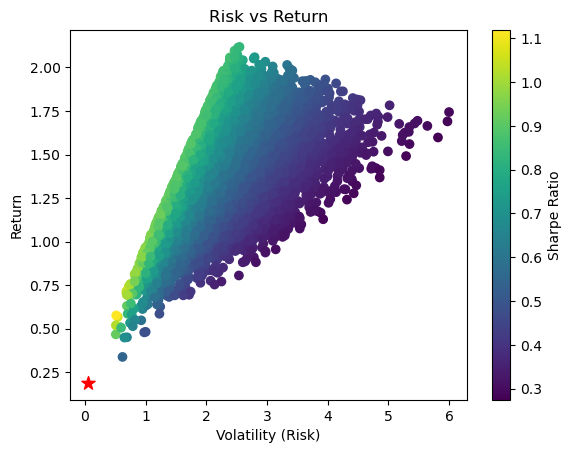

In [17]:
plt.scatter(results[1, :], results[0, :], c=results[2, :], cmap="viridis", marker="o")
plt.colorbar(label="Sharpe Ratio")
plt.scatter(portfolio_volatility, portfolio_return, color="red", marker="*", s=100)
plt.title("Risk vs Return")
plt.xlabel("Volatility (Risk)")
plt.ylabel("Return")
plt.show()

In [ ]:
# inflation adjustment only gold and btc.(annualized ones)